In [1]:
import pandas as pd 
import statsmodels.api as sm
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv', header=0)
df.head()
df.tail()

,date,store,item,sales
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62
912999,2017-12-31,10,50,82


In [3]:
print(df['date'].min(), df['date'].max())
df['date'] = pd.to_datetime(df['date'], format="%Y-%m-%d")

2013-01-01 2017-12-31


In [4]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt

In [5]:
df.shape

(913000, 4)

In [6]:
df= df[df['store']==1]
df= df[df['item']==1]
train=df.iloc[:-100]
test=df.iloc[-100:]
train.set_index('date', inplace=True, drop=True)
test.set_index('date', inplace=True, drop=True)

In [7]:
model = SimpleExpSmoothing(np.asarray(train['sales']))
model.index = pd.to_datetime(train.index[:100])


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\pandas\plotting\_matplotlib\converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


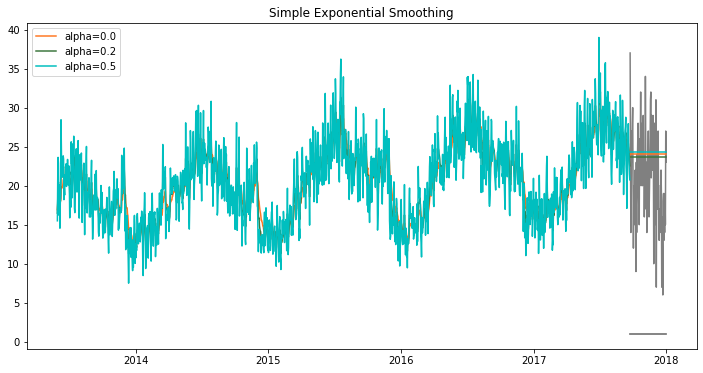

In [8]:
fit1 = model.fit()
pred1 = fit1.forecast(100)
fit2 = model.fit(smoothing_level=.2)
pred2 = fit2.forecast(100)
fit3 = model.fit(smoothing_level=.5)
pred3 = fit3.forecast(100)

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(test.index, test.values, color="gray")
for p, f, c in zip((pred1, pred2, pred3),(fit1, fit2, fit3),('#ff7823','#3c763d','c')):
    ax.plot(train.index[150:], f.fittedvalues[150:], color=c)
    ax.plot(test.index, p, label="alpha="+str(f.params['smoothing_level'])[:3], color=c)
plt.title("Simple Exponential Smoothing")    
plt.legend();


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\tsa\holtwinters.py:939: RuntimeWarning: invalid value encountered in double_scalars
  'initial_slope': b[0] / phi,


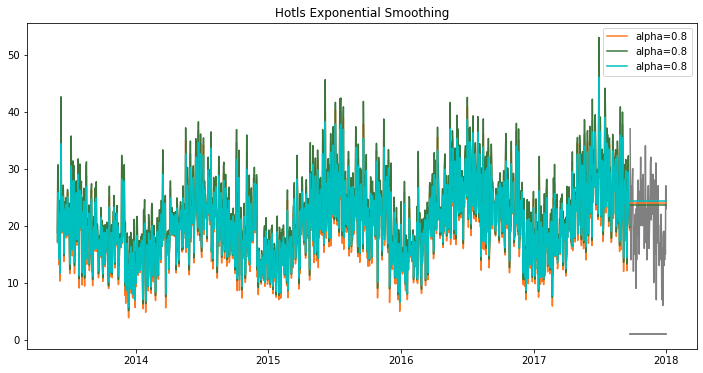

In [9]:
fit4 = Holt(train['sales']).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
fcast1 = fit1.forecast(100)

fit5 = Holt(train['sales'], exponential=True).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
fcast2 = fit2.forecast(100)

fit6 = Holt(train['sales'], damped=True).fit(smoothing_level=0.8, smoothing_slope=0.2)
fcast3 = fit3.forecast(100)

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(test.index, test.values, color="gray")
for p, f, c in zip((fcast1, fcast2, fcast3),(fit4, fit5, fit6),('#ff7823','#3c763d','c')):
    ax.plot(train.index[150:], f.fittedvalues[150:], color=c)
    ax.plot(test.index, p, label="alpha="+str(f.params['smoothing_level'])[:3], color=c)
plt.title("Hotls Exponential Smoothing")    
plt.legend();


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, Val

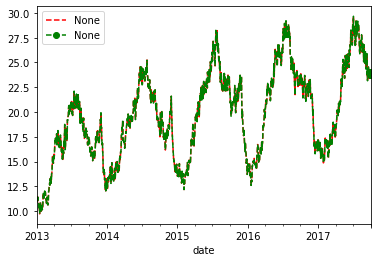

Forecasting sales of properties using Holt-Winters method with both additive and multiplicative seasonality.


In [10]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
fit1 = ExponentialSmoothing(train['sales'], seasonal_periods=4, trend='add', seasonal='add').fit(use_boxcox=True)
fit2 = ExponentialSmoothing(train['sales'], seasonal_periods=4, trend='add', seasonal='mul').fit(use_boxcox=True)
fit3 = ExponentialSmoothing(train['sales'], seasonal_periods=4, trend='add', seasonal='add', damped=True).fit(use_boxcox=True)
fit4 = ExponentialSmoothing(train['sales'], seasonal_periods=4, trend='add', seasonal='mul', damped=True).fit(use_boxcox=True)
fit1.fittedvalues.plot(style='--', color='red')
fit2.fittedvalues.plot(style='--', color='green')
fit1.forecast(12).plot(style='--', marker='o', color='red', legend=True)
fit2.forecast(12).plot(style='--', marker='o', color='green', legend=True)

plt.show()
print("Forecasting sales of properties using Holt-Winters method with both additive and multiplicative seasonality.")

C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\magi

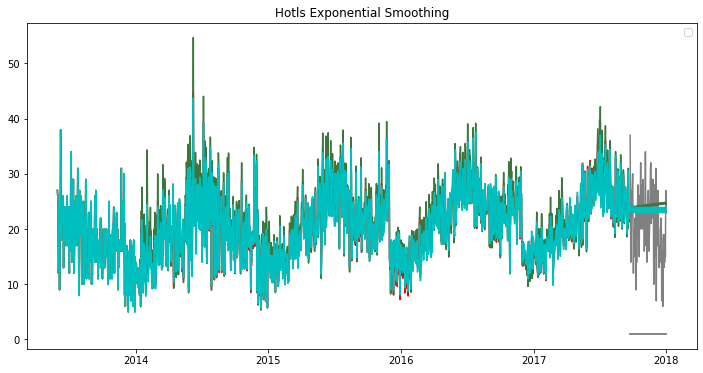

In [26]:
fit4 = ExponentialSmoothing(train['sales'], seasonal_periods=365, trend='add', seasonal='add').fit(use_boxcox=True)
fcast1 = fit1.forecast(100)

fit5 = ExponentialSmoothing(train['sales'], seasonal_periods=365, trend='add', seasonal='mul').fit(use_boxcox=True)
fcast2 = fit2.forecast(100)

fit6 = ExponentialSmoothing(train['sales'], seasonal_periods=365, trend='add', seasonal='add', damped=True).fit(use_boxcox=True)
fcast3 = fit3.forecast(100)

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(test.index, test.values, color="gray")
for p, f, c in zip((fcast1, fcast2, fcast3),(fit4, fit5, fit6),('red','#3c763d','c')):
    ax.plot(train.index[150:], f.fittedvalues[150:], color=c)
    ax.plot(test.index, p,  color=c)
plt.title("Hotls Exponential Smoothing")    
plt.legend();


In [40]:
test['sales'].iloc[-100:].head()

date
2017-09-23    37
2017-09-24    24
2017-09-25    14
2017-09-26    18
2017-09-27    27
Name: sales, dtype: int64

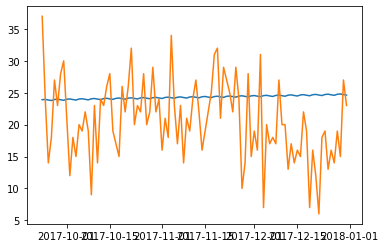

In [41]:
plt.plot(fcast1)
plt.plot(test['sales'].iloc[-100:])

In [42]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
expected = test['sales'].iloc[-100:]
predictions = fcast1
mae = mean_absolute_error(expected, predictions)
print('MAE: %f' % mae)
mse = mean_squared_error(expected, predictions)
print('MSE: %f' % mse)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

MAE: 5.829316
MSE: 51.110025
RMSE: 7.149128


In [43]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
expected = test['sales'].iloc[-100:]
predictions = fcast2
mae = mean_absolute_error(expected, predictions)
print('MAE: %f' % mae)
mse = mean_squared_error(expected, predictions)
print('MSE: %f' % mse)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

MAE: 5.834412
MSE: 51.213304
RMSE: 7.156347


In [44]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
expected = test['sales'].iloc[-100:]
predictions = fcast3
mae = mean_absolute_error(expected, predictions)
print('MAE: %f' % mae)
mse = mean_squared_error(expected, predictions)
print('MSE: %f' % mse)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

MAE: 5.437736
MSE: 44.849964
RMSE: 6.697012


In [55]:
fcast4 = fit4.forecast(100)
fcast5 = fit5.forecast(100)


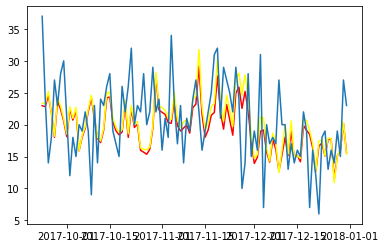

In [57]:
plt.plot(fcast4,color='red')
plt.plot(fcast5,color='yellow')

plt.plot(test['sales'].iloc[-100:])

In [47]:

expected = test['sales'].iloc[-100:]
predictions = fcast4
mae = mean_absolute_error(expected, predictions)
print('MAE: %f' % mae)
mse = mean_squared_error(expected, predictions)
print('MSE: %f' % mse)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

MAE: 4.681978
MSE: 36.654705
RMSE: 6.054313


In [48]:
expected = test['sales'].iloc[-100:]
predictions = fcast5
mae = mean_absolute_error(expected, predictions)
print('MAE: %f' % mae)
mse = mean_squared_error(expected, predictions)
print('MSE: %f' % mse)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

MAE: 4.605099
MSE: 37.255660
RMSE: 6.103741
